<a href="https://colab.research.google.com/github/VADLAPUDIOMPRAKASH/Buffalo-milk-price-prediction-RandomForest/blob/main/FeynnLabs_T1_OmPrakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Segmentation of McDonalds Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step3: Collecting Data

In [2]:
df=pd.read_csv('/content/mcdonalds.csv')

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#Step4: Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.shape

(1453, 15)

In [7]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


4.1 Data Cleaning

In [9]:
df.nunique()

,0
yummy,2
convenient,2
spicy,2
fattening,2
greasy,2
fast,2
cheap,2
tasty,2
expensive,2
healthy,2


In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'yummy': ['No' 'Yes']
Unique values in 'convenient': ['Yes' 'No']
Unique values in 'spicy': ['No' 'Yes']
Unique values in 'fattening': ['Yes' 'No']
Unique values in 'greasy': ['No' 'Yes']
Unique values in 'fast': ['Yes' 'No']
Unique values in 'cheap': ['Yes' 'No']
Unique values in 'tasty': ['No' 'Yes']
Unique values in 'expensive': ['Yes' 'No']
Unique values in 'healthy': ['No' 'Yes']
Unique values in 'disgusting': ['No' 'Yes']
Unique values in 'Like': ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Unique values in 'Age': [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
Unique values in 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Unique values in 'Gender': ['Female' 'Male']


4.2 Descriptive Analysis

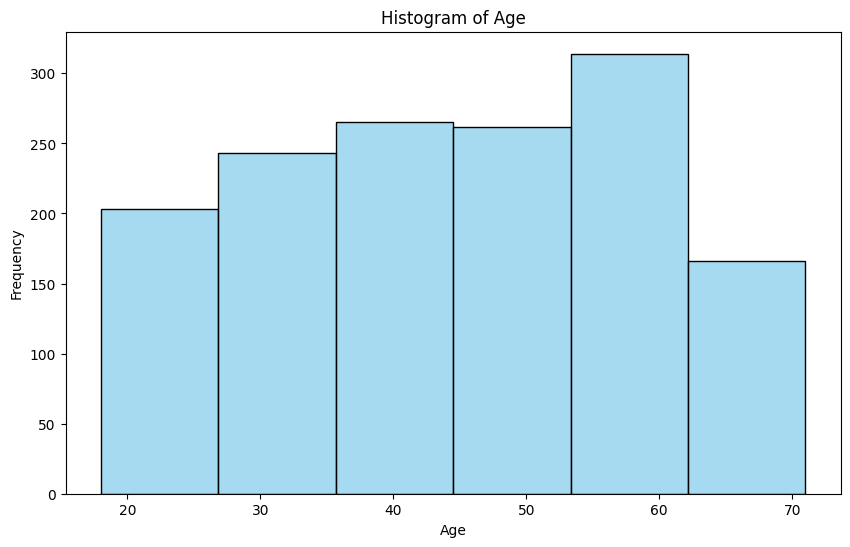

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, bins=6, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


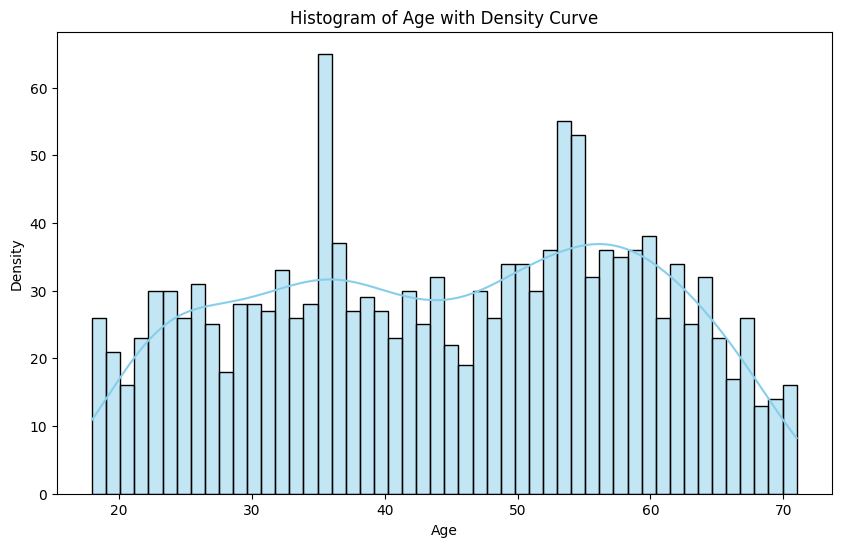

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Age with Density Curve')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

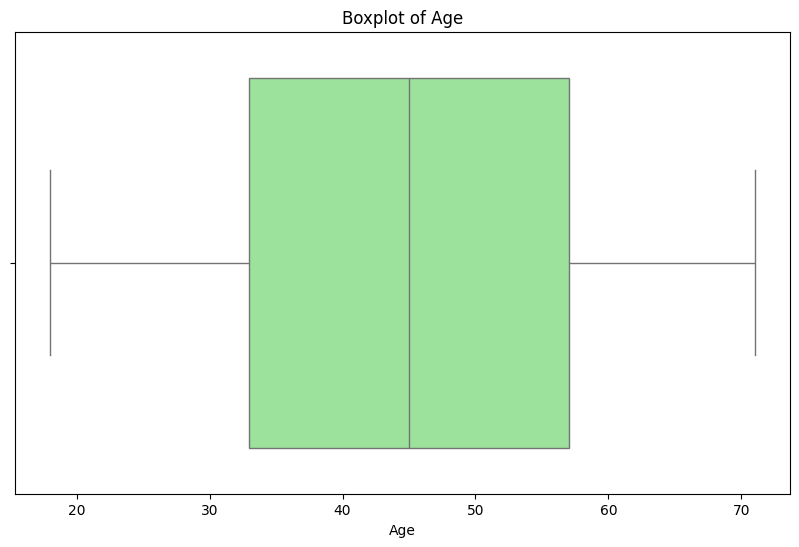

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [14]:
age_summary = df['Age'].describe()
print("Summary statistics for Age:\n", age_summary)

Summary statistics for Age:
 count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64


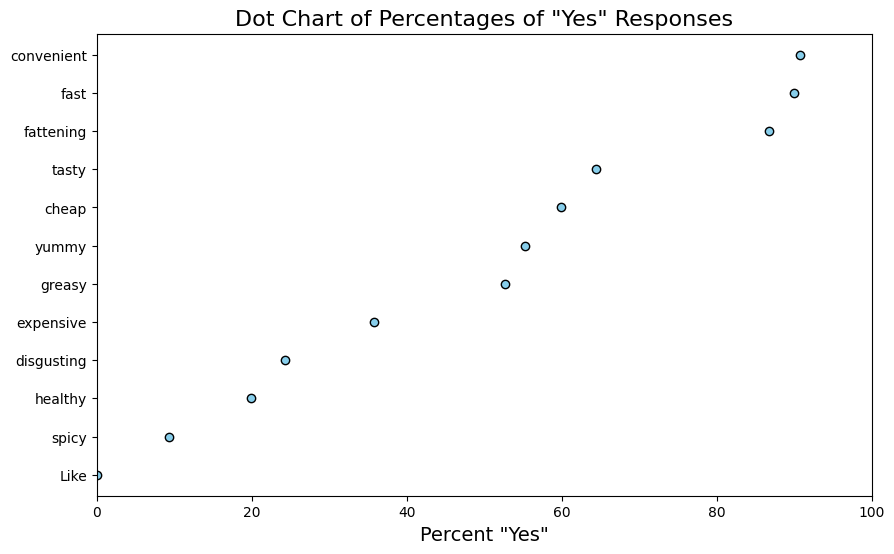

In [15]:
vac_bool = df.iloc[:, :-3] == 'Yes'
yes_percentages = vac_bool.mean() * 100

# Sort the percentages in descending order
yes_percentages_sorted = yes_percentages.sort_values()

# Create a dot chart to visualize the percentages
plt.figure(figsize=(10, 6))
plt.scatter(yes_percentages_sorted, yes_percentages_sorted.index, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Dot Chart of Percentages of "Yes" Responses', fontsize=16)
plt.xlabel('Percent "Yes"', fontsize=14)
plt.xlim(0, 100)

# Show the plot
plt.show()

4.3 Preprocessing

In [16]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Convert ordinal 'Like' column (map textual ratings to numeric values)
like_mapping = {'-3': -3, '+2': 2, '+1': 1, '+4': 4, 'I love it!+5': 5, 'I hate it!-5': -5, '-2': -2, '+3': 3, '0': 0, '-4': -4, '-1': -1}
df['Like'] = df['Like'].map(like_mapping)

# Convert 'VisitFrequency' to numeric (or you can one-hot encode it if needed)
visit_mapping = {
    'Every three months': 0,
    'Once a week': 1,
    'Once a month': 2,
    'Once a year': 3,
    'More than once a week': 4,
    'Never': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)

# Convert 'Gender' to numeric (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


<ipython-input-16-8036bb6e6084>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [17]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


Standardizing Numeric Variables


In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'Age' and 'Like' need standardization

# Standardizing the Age column
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# Assuming 'Like' has already been mapped to numeric values
df['Like_scaled'] = scaler.fit_transform(df[['Like']])

print(df[['Age', 'Age_scaled', 'Like', 'Like_scaled']])


      Age  Age_scaled  Like  Like_scaled
0      61    1.153258    -3    -1.212225
1      51    0.449839     2     0.392515
2      62    1.223600     1     0.071567
3      69    1.715993     4     1.034411
4      49    0.309156     2     0.392515
...   ...         ...   ...          ...
1448   47    0.168472    -5    -1.854121
1449   36   -0.605289     2     0.392515
1450   52    0.520181     3     0.713463
1451   41   -0.253579     4     1.034411
1452   30   -1.027340    -3    -1.212225

[1453 rows x 4 columns]


4.4 Principle Component Anlaysis

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

MD_x = df[binary_columns]

col_means = MD_x.mean()
print(round(col_means,2))


pca = PCA()
MD_pca = pca.fit_transform(MD_x)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


print("PCA Summary:")
print("Explained variance ratio:", explained_variance_ratio)
print("Singular values:", pca.singular_values_)



yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
PCA Summary:
Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Singular values: [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


In [21]:
import pandas as pd
import numpy as np

pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance_ratio = pca.explained_variance_ratio_

pca_summary = pd.DataFrame({
    'PC': range(1, len(explained_variance_ratio) + 1),
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': np.cumsum(explained_variance_ratio)
})

print("Importance of components:")
pca_summary.T

Importance of components:


,0,1,2,3,4,5,6,7,8,9,10
PC,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000
Standard deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


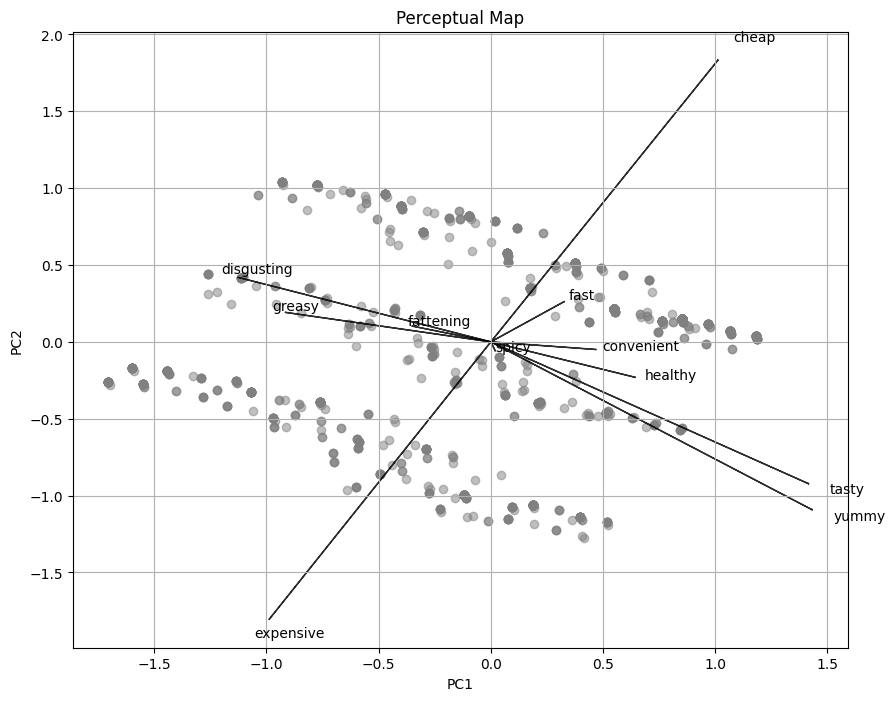

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)

# Add feature vectors
for i, feature in enumerate(binary_columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*3,
              pca.components_[1, i]*3,
              color='black', alpha=0.8)
    plt.text(pca.components_[0, i]*3.2,
             pca.components_[1, i]*3.2,
             feature)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map')
plt.grid(True)
plt.show()

#Step 5: Extracting Segments


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure the processed MD_x DataFrame is ready
print(MD_x.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


Using K- Means

In [63]:
# Initialize variables
k_values = range(2, 9)
cluster_results = {}
inertia_values = []

# Perform k-means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    cluster_results[k] = kmeans.labels_
    inertia_values.append(kmeans.inertia_)

# Print inertia values
print("Inertia values:", inertia_values)


Inertia values: [2145.5037269171557, 1818.7176591653833, 1602.9860148663201, 1435.3247856934029, 1332.1504830614558, 1249.2338900799716, 1191.5809481928013]


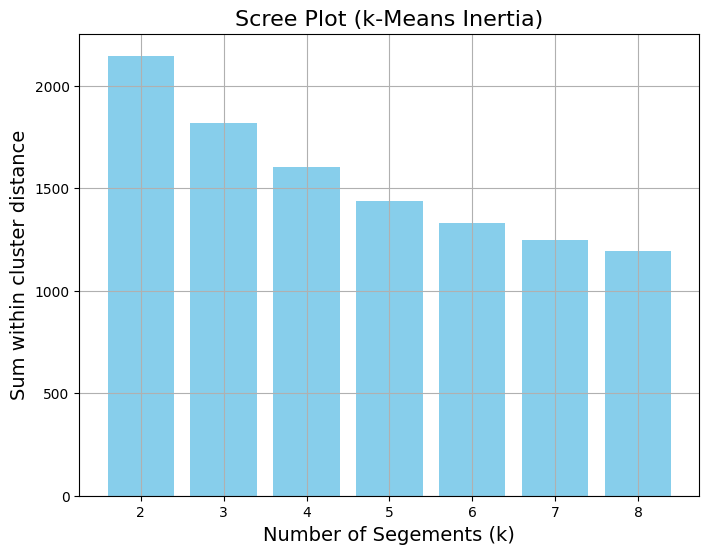

In [66]:
# Plot inertia values to find the elbow
plt.figure(figsize=(8, 6))
plt.bar(k_values, inertia_values, color='skyblue')
plt.title("Scree Plot (k-Means Inertia)", fontsize=16)
plt.xlabel("Number of Segements (k)", fontsize=14)
plt.ylabel("Sum within cluster distance", fontsize=14)
plt.grid(True)
plt.show()


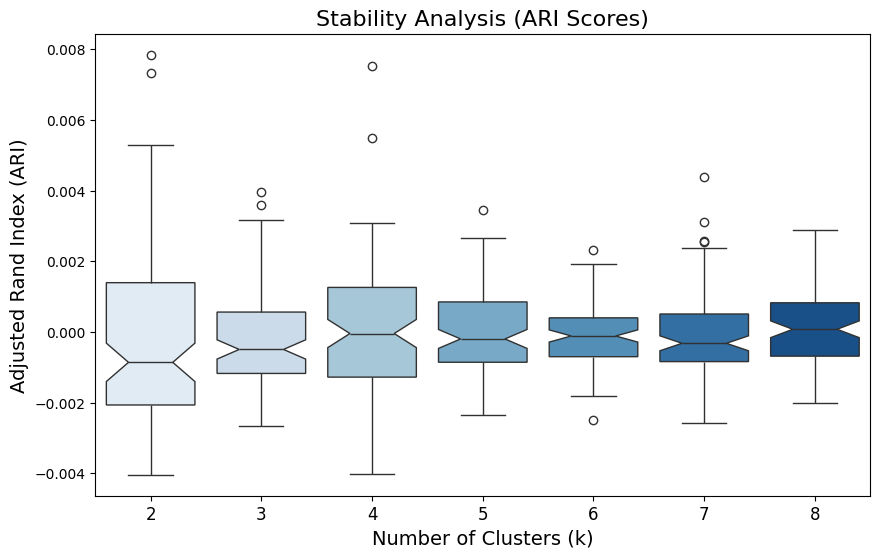

In [68]:
from sklearn.utils import resample

# Stability analysis: Bootstrap sampling and ARI calculation
def stability_analysis(data, cluster_results, k_values, n_boot=100):
    ari_scores = {k: [] for k in k_values}
    for k in k_values:
        for _ in range(n_boot):
            # Create a bootstrap sample
            data_bootstrap = resample(data, random_state=None)
            # Fit k-means to bootstrap sample
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
            kmeans.fit(data_bootstrap)
            # Compute ARI between original and bootstrap labels
            ari = adjusted_rand_score(cluster_results[k], kmeans.labels_)
            ari_scores[k].append(ari)
    return ari_scores

# Perform stability analysis
ari_scores = stability_analysis(MD_x, cluster_results, k_values)

# Visualize stability using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=[ari_scores[k] for k in k_values], palette='Blues', notch=True)
plt.xticks(ticks=np.arange(len(k_values)), labels=k_values, fontsize=12)
plt.title("Stability Analysis (ARI Scores)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Adjusted Rand Index (ARI)", fontsize=14)
plt.show()


<ipython-input-71-9617e26d7d98>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='pastel')


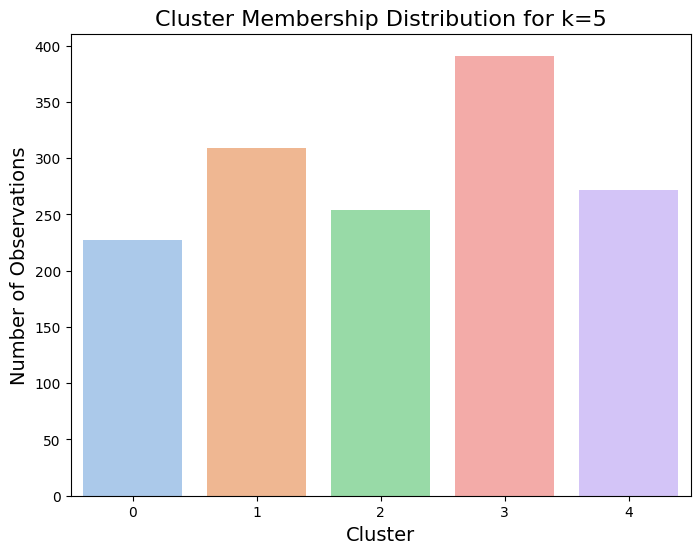

In [71]:
# Extract the optimal cluster labels (e.g., for k=4)
optimal_k = 5
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)
df['Cluster'] = final_kmeans.fit_predict(MD_x)

# Visualize cluster membership distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='pastel')
plt.title(f"Cluster Membership Distribution for k={optimal_k}", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Number of Observations", fontsize=14)
plt.show()


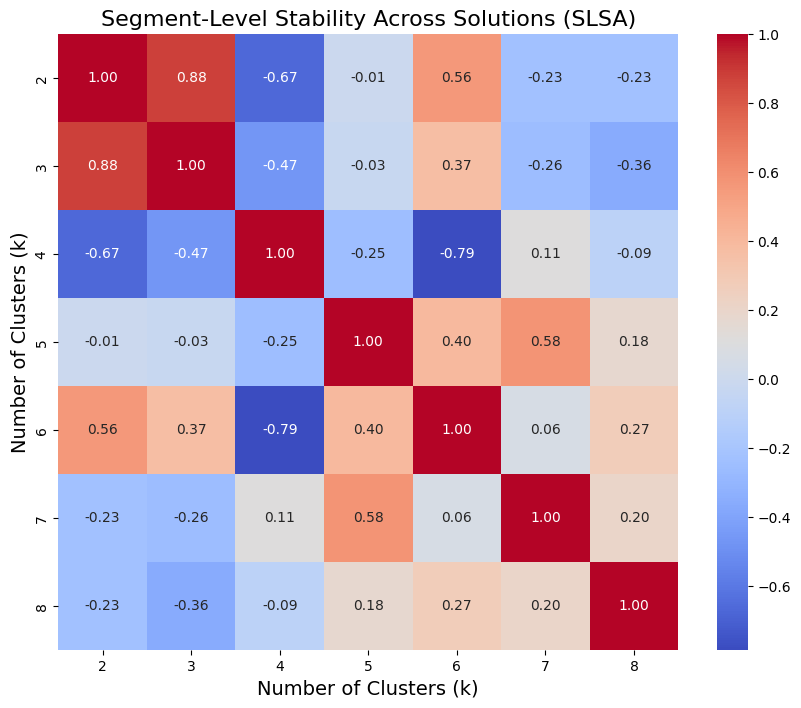

In [72]:
# Analyze transitions across cluster solutions
transitions = pd.DataFrame({
    k: cluster_results[k] for k in k_values
})

# Plot transitions as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transitions.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Segment-Level Stability Across Solutions (SLSA)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Number of Clusters (k)", fontsize=14)
plt.show()


Cluster Summary:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.013216    0.651982  0.083700   0.911894  0.718062  0.731278   
1        0.792880    0.980583  0.122977   0.970874  1.000000  0.948220   
2        0.870079    0.960630  0.098425   0.885827  0.519685  0.838583   
3        0.846547    0.976982  0.092072   0.710997  0.000000  0.964194   
4        0.011029    0.889706  0.066176   0.919118  0.591912  0.952206   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.061674  0.096916   0.947137  0.066079    0.704846 -2.638767   
1        0.893204  0.954693   0.106796  0.181230    0.171521  1.983819   
2        0.000000  0.940945   1.000000  0.192913    0.062992  2.169291   
3        0.884910  0.966752   0.030691  0.375959    0.015345  2.703325   
4        0.860294  0

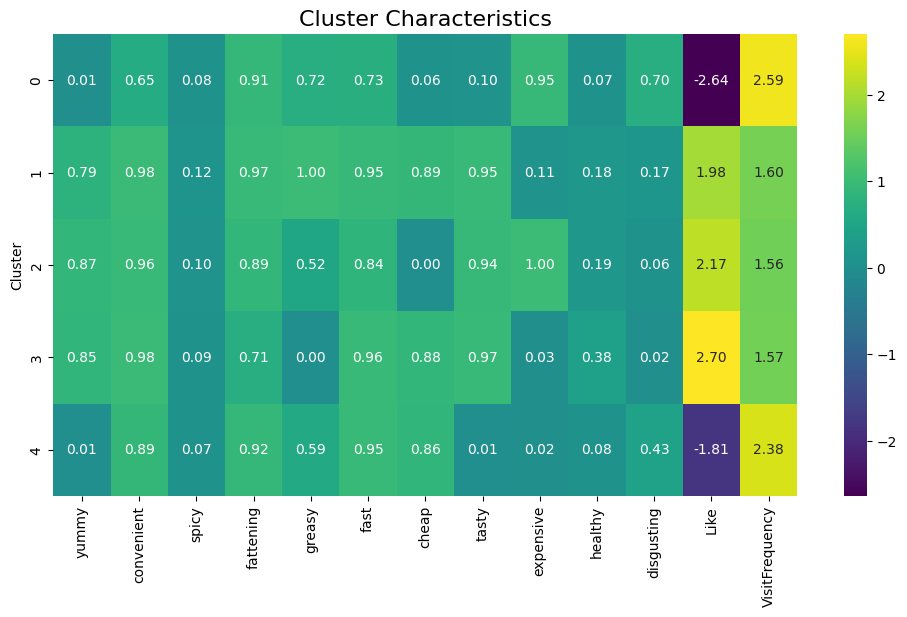

In [74]:
# Aggregate by cluster to understand cluster characteristics
cluster_summary = df.groupby('Cluster')[binary_columns + ['Like', 'VisitFrequency']].mean()

# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary)

# Visualize a heatmap of cluster characteristics
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='viridis', fmt=".2f")
plt.title("Cluster Characteristics", fontsize=16)
plt.show()


Using Mixture of Distribution

In [80]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
log_likelihoods = []
aic_values = []
bic_values = []
icl_values = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)  # Fit GMM on binary data
    log_likelihoods.append(gmm.lower_bound_)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

    # Calculate ICL: ICL = BIC - 2 * Log-Likelihood
    icl_values.append(bic_values[-1] - 2 * log_likelihoods[-1])

# Combine results into a DataFrame
criteria_df = pd.DataFrame({
    "k": k_values,
    "LogLikelihood": log_likelihoods,
    "AIC": aic_values,
    "BIC": bic_values,
    "ICL": icl_values
})


In [77]:
print(criteria_df)

   k  LogLikelihood           AIC           BIC           ICL
0  2       3.402351  -9577.232084  -8758.617306  -8765.422009
1  3       8.234940 -23464.736403 -22234.173543 -22250.643424
2  4       9.456782 -26859.407760 -25216.896819 -25235.810382
3  5      12.294522 -34949.887740 -32895.428716 -32920.017761
4  6      12.713328 -36011.065145 -33544.658040 -33570.084695
5  7      11.738066 -33022.286952 -30143.931765 -30167.407898
6  8      14.907659 -42075.998640 -38785.695372 -38815.510691


In [81]:
# Fit the mixture model with the optimal number of components (let's say k=4 for this example)
optimal_k = 4
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=1234)
df['Mixture'] = gmm.fit_predict(MD_x)

# Display the segments (latent classes) for each data point
print(df[['Mixture']].head())


   Mixture
0        1
1        3
2        1
3        0
4        2


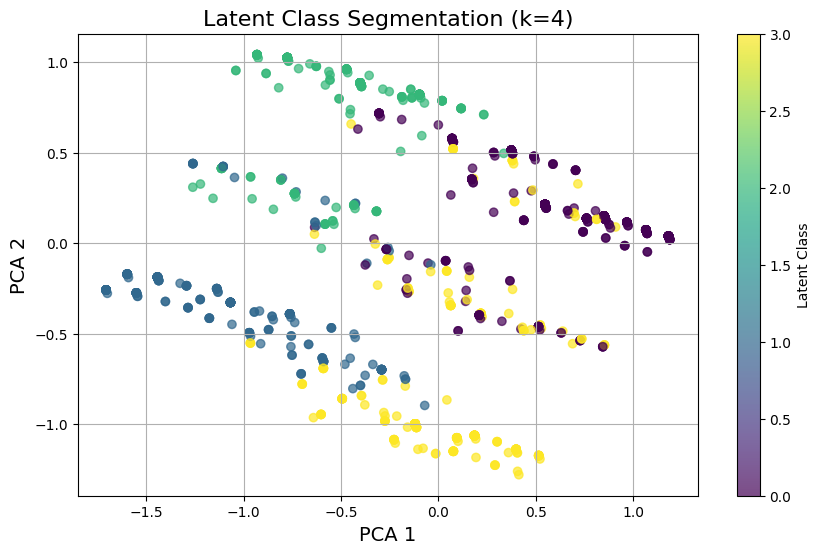

In [82]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plot the latent classes in the reduced 2D space
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=df['Mixture'], cmap='viridis', alpha=0.7)
plt.title(f'Latent Class Segmentation (k={optimal_k})', fontsize=16)
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)
plt.colorbar(label='Latent Class')
plt.grid(True)
plt.show()


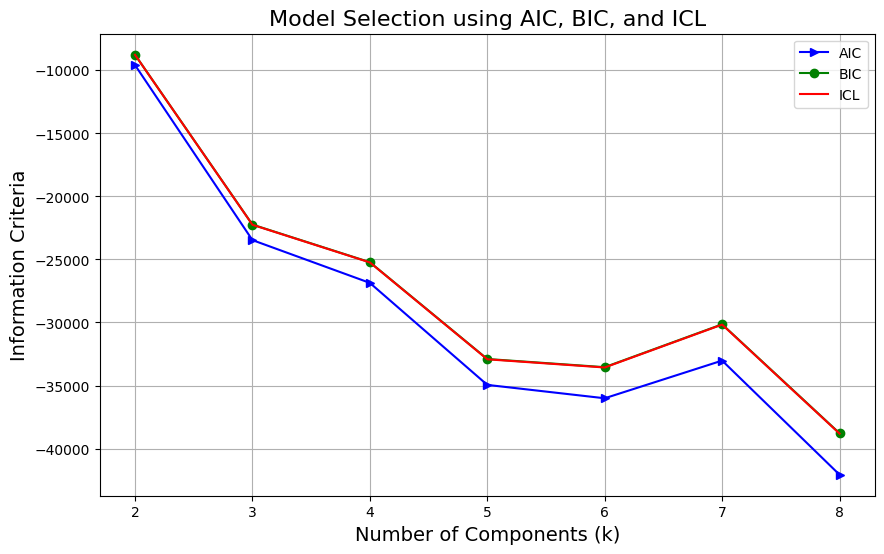

In [86]:
# Plot AIC, BIC, and ICL
plt.figure(figsize=(10, 6))
plt.plot(criteria_df["k"], criteria_df["AIC"], label="AIC", marker='>', color='blue')
plt.plot(criteria_df["k"], criteria_df["BIC"], label="BIC", marker='o', color='green')
plt.plot(criteria_df["k"], criteria_df["ICL"], label="ICL", color='red')
plt.xlabel("Number of Components (k)", fontsize=14)
plt.ylabel("Information Criteria", fontsize=14)
plt.title("Model Selection using AIC, BIC, and ICL", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


Using Mixtures of Regression Models

In [90]:
mcdonalds=df.copy()

In [91]:
mcdonalds['Like_n'] = 6 - mcdonalds['Like']

In [95]:
from sklearn.mixture import GaussianMixture

# Independent variables (perceptions)
X = mcdonalds.drop(columns=['Like', 'Like_n', 'Age', 'VisitFrequency', 'Gender'])

# Fit a Gaussian Mixture Model (GMM) for segmentation (2 components)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Predict the segment for each data point
segments = gmm.predict(X)

# Add segment labels to the original DataFrame
mcdonalds['Segment'] = segments

# Output the first few rows to check the segment assignment
mcdonalds.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Age_scaled,Like_scaled,mixture_segment,kmeans_segment,Cluster,Mixture,KMeans,Mixture_Reinit,Like_n,Segment
0,0,1,0,1,0,1,1,0,1,0,...,1.153258,-1.212225,2,2,4,1,4,1,9,1
1,1,1,0,1,1,1,1,1,1,0,...,0.449839,0.392515,0,3,1,3,1,3,4,1
2,0,1,1,1,1,1,0,1,1,1,...,1.223600,0.071567,0,3,2,1,2,1,5,1
3,1,1,0,1,1,1,1,1,0,0,...,1.715993,1.034411,3,0,1,0,1,0,2,0
4,0,1,0,1,1,1,1,0,0,1,...,0.309156,0.392515,2,2,4,2,4,2,4,1


In [97]:
# List of independent variables (perceptions)
independent_vars = mcdonalds.columns[0:11]

# Create the model formula
formula = "Like_n ~ " + " + ".join(independent_vars)
print(formula)


Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [105]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
import numpy as np

# Independent variables (perceptions)
X = mcdonalds[independent_vars]

# Fit Gaussian Mixture Model (GMM) for segmentation (2 segments)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(X)

# Predict the segment for each data point
segments = gmm.predict(X)

# Add segment labels to the original DataFrame
mcdonalds['Segment'] = segments

# Fit linear regression models for each segment
regression_models = {}
for segment in np.unique(segments):
    # Filter data by segment
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]

    # Independent variables (perceptions)
    X_segment = segment_data[independent_vars]

    # Dependent variable (degree of liking)
    y_segment = segment_data['Like_n']

    # Fit Linear Regression Model for each segment
    model = LinearRegression()
    model.fit(X_segment, y_segment)

    # Store the model in the dictionary
    regression_models[segment] = model

# Display the coefficients for each segment
for segment, model in regression_models.items():
    print(f"Segment {segment} - Coefficients:")
    for feature, coef in zip(independent_vars, model.coef_):
        print(f"{feature}: {coef}")
    print("-" * 40)


Segment 0 - Coefficients:
yummy: -2.1943845019514088
convenient: -2.220446049250313e-16
spicy: 0.3474776194623507
fattening: 0.4895802571223238
greasy: 0.21456481455652054
fast: 0.020004922654395872
cheap: 0.05050665692808248
tasty: 3.469446951953614e-18
expensive: 0.0
healthy: -0.3988738906074768
disgusting: 1.1955848891407277
----------------------------------------
Segment 1 - Coefficients:
yummy: 0.0
convenient: -1.1205212297366498
spicy: 0.4541860083233912
fattening: 0.218108484463337
greasy: 0.31227524308406246
fast: -0.4203770124865874
cheap: 0.950118613320845
tasty: -0.8286282257672715
expensive: 5.551115123125783e-17
healthy: -0.39648607449570233
disgusting: 2.2992899932963367
----------------------------------------
Segment 2 - Coefficients:
yummy: 0.0
convenient: -1.5038412148549076
spicy: 0.7205406543211595
fattening: 0.5434606824095513
greasy: 0.2300283244130611
fast: -0.02934615897128187
cheap: -0.298335578220958
tasty: -0.9971468121376612
expensive: 8.326672684688674e-17

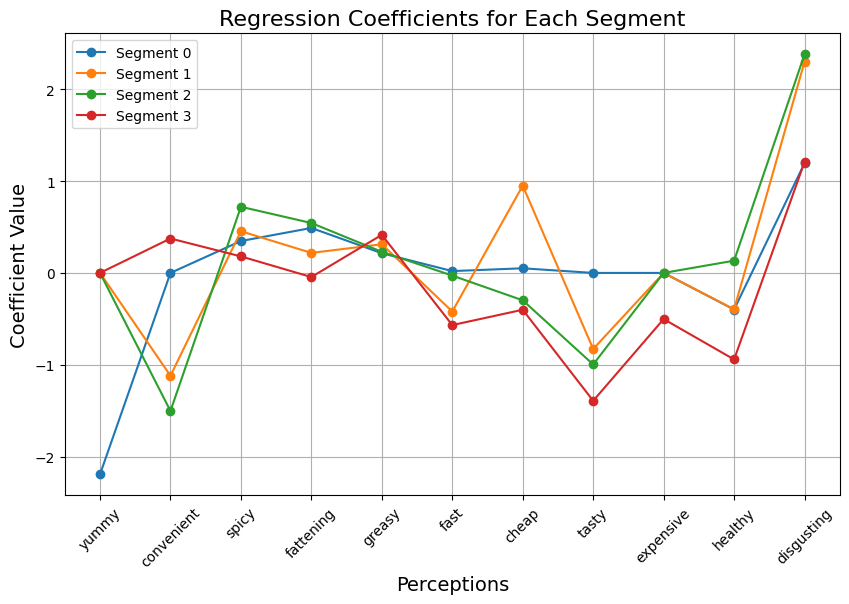

In [106]:
import matplotlib.pyplot as plt

# Plot the regression coefficients for each segment
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the models to plot coefficients
for segment, model in regression_models.items():
    coefficients = model.coef_

    # Plot the coefficients for each segment
    ax.plot(independent_vars, coefficients, label=f'Segment {segment}', marker='o')

ax.set_xlabel('Perceptions', fontsize=14)
ax.set_ylabel('Coefficient Value', fontsize=14)
ax.set_title('Regression Coefficients for Each Segment', fontsize=16)
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#Step6: Profiling Segments

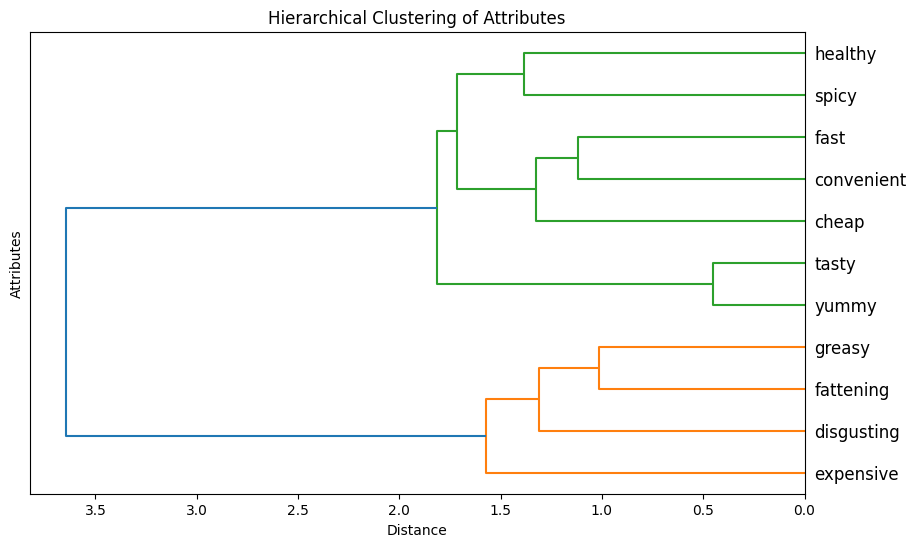

In [107]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering on the attributes (columns)
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X.T)
# Perform linkage on the correlation matrix
Z = sch.linkage(correlation_matrix, method='ward')

# Get the feature names for labeling
feature_names = X.columns.tolist()

# Create a dendrogram to visualize the clustering of attributes
plt.figure(figsize=(10, 6))
sch.dendrogram(Z, labels=feature_names, orientation='left', leaf_rotation=0)
plt.title('Hierarchical Clustering of Attributes')
plt.xlabel('Distance')
plt.ylabel('Attributes')
plt.show()

<ipython-input-108-66431e7222bd>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(segment_percentage[i] - overall_percentage[i]) > 0.25:  # 25% absolute difference
<ipython-input-108-66431e7222bd>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.barh(independent_vars[i], segment_percentage[i], color='orange')


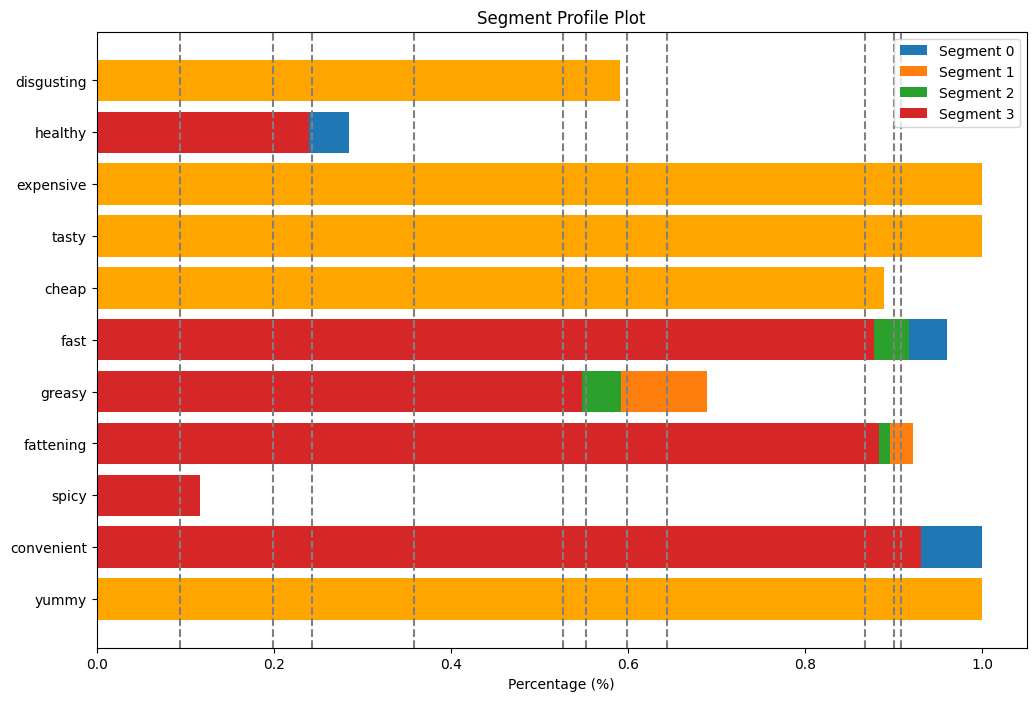

In [108]:
import seaborn as sns
import numpy as np

# Compute the percentage of respondents associating each perception with McDonald's
overall_percentage = X.mean(axis=0)

# Plot the segment profile
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over the segments and plot their characteristics
for segment in np.unique(segments):
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]
    segment_percentage = segment_data[independent_vars].mean(axis=0)

    # Plot the segment percentages as bars
    ax.barh(independent_vars, segment_percentage, label=f'Segment {segment}')

# Add a horizontal line to represent overall percentage
for attribute, perc in zip(independent_vars, overall_percentage):
    ax.axvline(x=perc, color='grey', linestyle='--')

# Highlight the bars for marker variables (where differences > 25% or > 50%)
for segment in np.unique(segments):
    segment_data = mcdonalds[mcdonalds['Segment'] == segment]
    segment_percentage = segment_data[independent_vars].mean(axis=0)
    for i, attribute in enumerate(independent_vars):
        if np.abs(segment_percentage[i] - overall_percentage[i]) > 0.25:
            ax.barh(independent_vars[i], segment_percentage[i], color='orange')

# Labels and legend
ax.set_xlabel('Percentage (%)')
ax.set_title('Segment Profile Plot')
ax.legend()
plt.show()


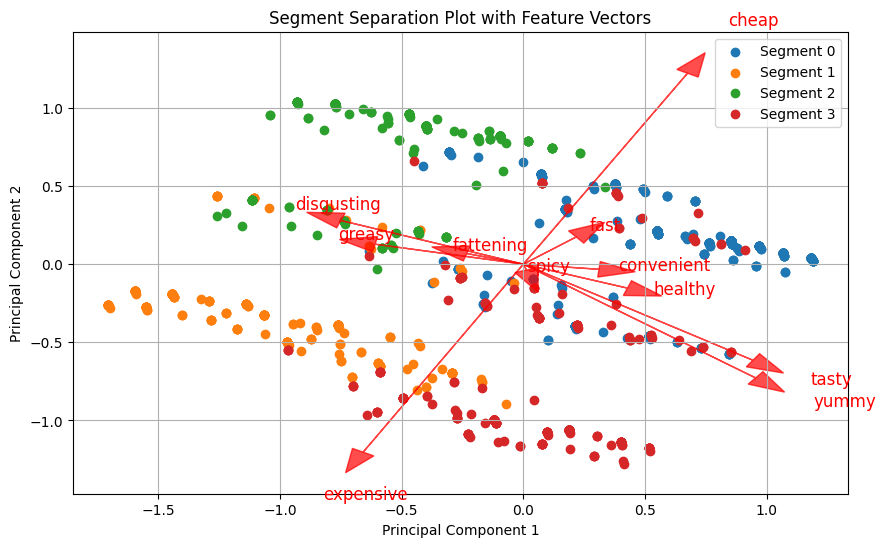

In [110]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the segments in the 2D PCA space
plt.figure(figsize=(10, 6))

# Scatter plot for each segment
for segment in np.unique(segments):
    plt.scatter(X_pca[segments == segment, 0], X_pca[segments == segment, 1], label=f'Segment {segment}')

# Add feature vectors (arrows) to represent each feature in the PCA space
for i, feature in enumerate(independent_vars):  # independent_vars is a list of feature names
    plt.arrow(0, 0, pca.components_[0, i] * 2, pca.components_[1, i] * 2,
              color='r', alpha=0.7, head_width=0.1)
    plt.text(pca.components_[0, i] * 2.5, pca.components_[1, i] * 2.5, feature, color='r', fontsize=12)

# Add labels and a legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot with Feature Vectors')
plt.legend()
plt.grid(True)
plt.show()


In [118]:
mcdonalds['Segment']

,Segment
0,1
1,3
2,1
3,0
4,2
...,...
1448,1
1449,0
1450,3
1451,0


#Step 7:  Describing Segments

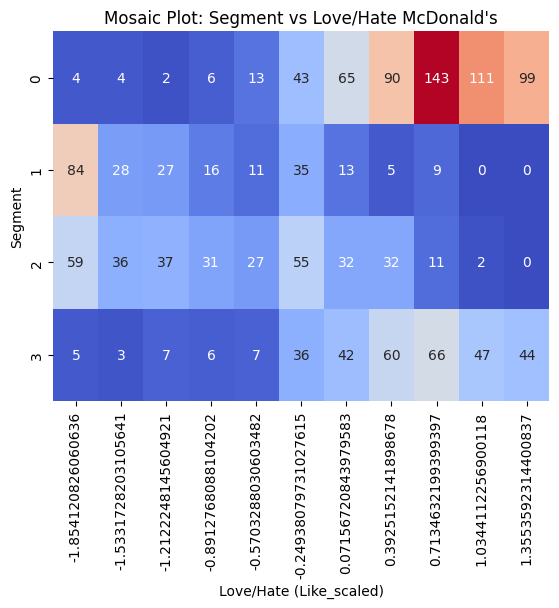

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Step 1: Mosaic Plot for Segment vs Like/Hate McDonald's
contingency_table_love_hate = pd.crosstab(df['kmeans_segment'], df['Like_scaled'])
sns.heatmap(contingency_table_love_hate, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title("Mosaic Plot: Segment vs Love/Hate McDonald's")
plt.xlabel("Love/Hate (Like_scaled)")
plt.ylabel("Segment")
plt.show()


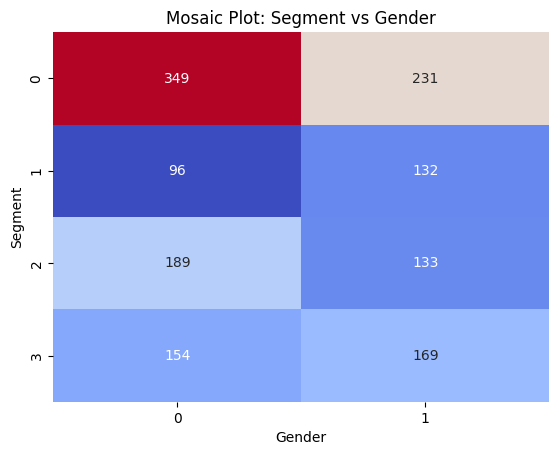

In [126]:
# Step 2: Mosaic Plot for Segment vs Gender
contingency_table_gender = pd.crosstab(df['kmeans_segment'], df['Gender'])
sns.heatmap(contingency_table_gender, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title("Mosaic Plot: Segment vs Gender")
plt.xlabel("Gender")
plt.ylabel("Segment")
plt.show()




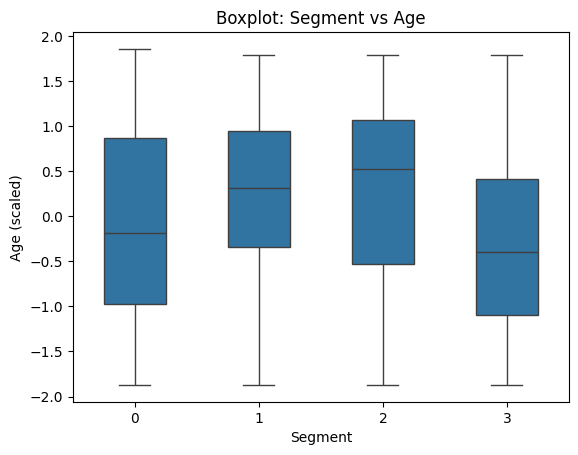

In [123]:
# Step 3: Boxplot for Segment vs Age
sns.boxplot(x='kmeans_segment', y='Age_scaled', data=df, showfliers=False, width=0.5)
plt.title("Boxplot: Segment vs Age")
plt.xlabel("Segment")
plt.ylabel("Age (scaled)")
plt.show()



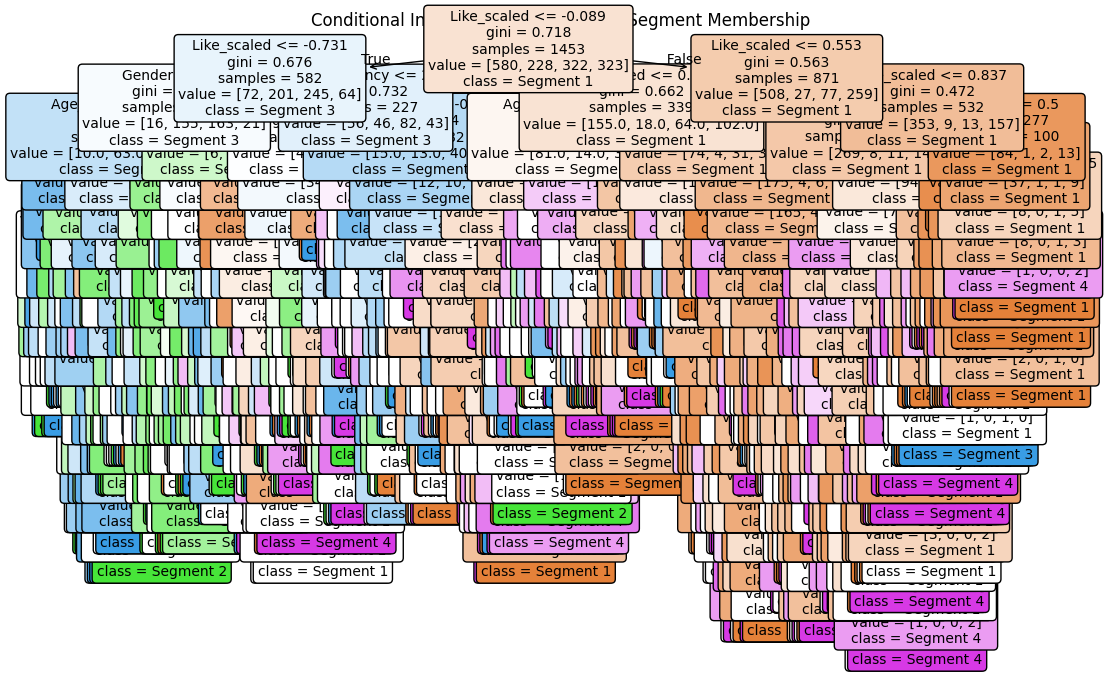

In [124]:
# Step 4: Conditional Inference Tree for Predicting Segment Membership
# Prepare the data for classification (ensure categorical variables are encoded correctly)
X = df[['Like_scaled', 'Age_scaled', 'VisitFrequency', 'Gender']]  # Independent variables
y = df['kmeans_segment']  # Dependent variable (segment)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=['Like_scaled', 'Age_scaled', 'VisitFrequency', 'Gender'],
               class_names=[f'Segment {i+1}' for i in range(len(np.unique(df['kmeans_segment'])))] ,
               rounded=True, fontsize=10)
plt.title("Conditional Inference Tree: Predicting Segment Membership")
plt.show()

#Step 8: Selecting (the) Target Segment(s)

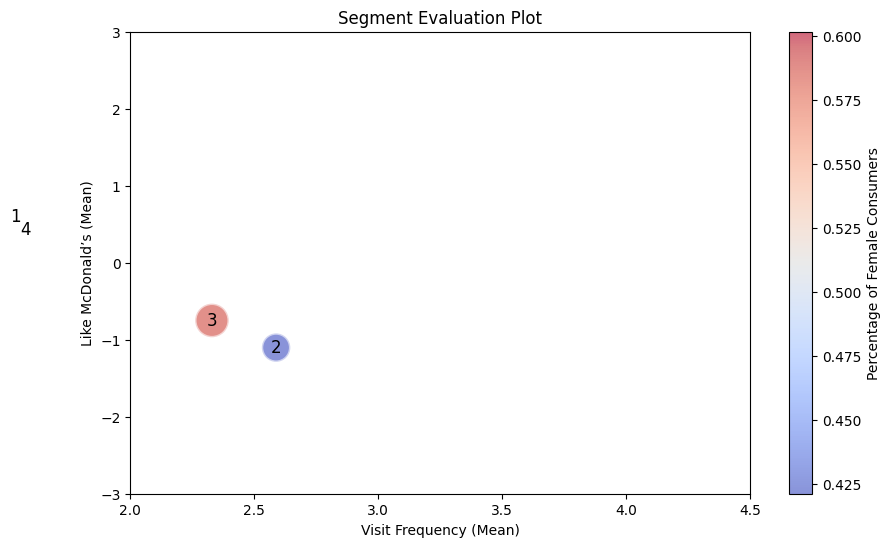

In [127]:
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Calculate the mean values for VisitFrequency and Like_scaled for each segment
visit_means = df.groupby('kmeans_segment')['VisitFrequency'].mean()
like_means = df.groupby('kmeans_segment')['Like_scaled'].mean()

# Step 2: Calculate the percentage of female consumers for each segment
female_percent = df[df['Gender'] == 0].groupby('kmeans_segment').size() / df.groupby('kmeans_segment').size()

# Step 3: Create the segment evaluation plot
plt.figure(figsize=(10, 6))

# Plot the means
plt.scatter(visit_means, like_means, s=female_percent * 1000, c=female_percent, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=2)

# Add labels for the segments
for i, segment in enumerate(visit_means.index):
    plt.text(visit_means[segment], like_means[segment], str(segment + 1), fontsize=12, ha='center', va='center')

# Label axes
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like McDonald’s (Mean)')

# Set axis limits based on the R implementation
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Title and show the plot
plt.title('Segment Evaluation Plot')
plt.colorbar(label='Percentage of Female Consumers')
plt.show()
